# Beams Pipeline Tutorial

## What software do I need for this tutorial?

Welcome to the Beams Pipeline Tutorial! Before beginning, you will need the Map Multi Tool, as well as the beam systematics files.

To get the Map Multi Tool on your computer, go to your command line or terminal and paste in:

```git clone https://github.com/CMB-S4/map_multi_tool.git```

For the beam systematics, paste in:

```git clone https://github.com/laurensaunders/beams_pipeline.git```

You will also need ```numpy```, ```scipy```, ```matplotlib```, ```math```, and ```time```, so make sure that each of those is also installed on your computer.

## Introduction to Beams

[Window function definition goes here, along with how to find it, relation to beams, power spectra relationship]

[Talk about leakage from temperature to polarization and E-->B polarization leakage.]

## Introduction to Map Multi Tool

The Map Multi Tool software is a new map-based tool for studying beam window functions. [Explanation of what a window function is, how we find it, how it's related to the beam, how it affects the power spectra that we measure (beam * CMB, have to divide out the beam to get the PS).] There are beam leakages from temperature to polarization and E$\rightarrow$B polarization leakage, but our main concern is in the temperature to polarization leakage because it is of much greater magnitude. Polarization to polarization (E$\rightarrow$B) leakage is also important because... The tool is useful for showing ways that CMB systematics such as crosstalk, pointing miscalibration, and optical irregularities that show up in the beams can produce this leakage.

Map Multi Tool has two sample Jupyter notebooks that let you explore some of the software's functionality--both in a crosstalk implementation and in a beams implementation. Each of these notebooks has a simple model of the instrument scenario and walks through how to find the leakage spectra.



## Beam Pipeline + Map Multi Tool

Size scale of a feature in the beam corresponds to the $\ell$ that you see the systematic at. In this notebook, we'll show this through some demonstrations.

### Beam Perturbations

Ideally, when we study our beams, we would see something Gaussian and perfectly symmetrical, like this one:

<div>
<img src="Users/laurensaunders/gaussian_beam_example.png" width="800" alt="Unperturbed Gaussian beam"/>
</div>

However, our optics are never this ideal. A mismatch of main-beam full with at half maximum (FWHM) produces a monopole perturbation:

<div>
<img src="Users/laurensaunders/monopole_beam_example.png" width="800" alt="Monopole perturbation of a beam"/>
</div>

Differential pointing produces a dipole perturbation:

<div>
<img src="Users/laurensaunders/dipole_beam_example.png" width="800" alt="Dipole perturbation of a beam"/>
</div>

Differential ellipticities produce a quadrupole perturbation:
<div>
<img src="Users/laurensaunders/quadrupole_beam_example.png" width="800" alt="Quadrupole perturbation of a beam"/>
</div>

These effects are added to the beam, which creates a more complicated beam shape. Additionally, due to reflections or misalignment, we sometimes see a ghost beam, which looks like a copy of the main beam that shows up away from the center of the main beam:

<div>
<img src="Users/laurensaunders/ghost_beam_example.png" width="800" alt="Gaussian beam with a ghost in the lower right corner"/>
</div>

### Feedhorns

Feedhorns are horn-shaped cavities that act as waveguides as light from the CMB travels to the detectors. A cross-section of a feedhorn is shown here:

<div>
<img src="Users/laurensaunders/Desktop/IMG_20191011_091008.jpg" width="800" alt="Cross-section of a 90/150 GHz feedhorn"/>
</div>

The beam shape is fully defined by the feedhorn, which makes it easier to model and to test the T$\rightarrow$P leakage. For feedhorns, the primary systematic is beam ellipticity (which produces a quadrupole pattern), although other optics can cause more effects. Because feedhorns produce easy-to-model beams, we will focus on these types of beams in this tutorial.

[add dummy of ghost so see something in high ell? Clone of main beam some distance out that is tunable, amplitude MUCH smaller]

[talk about what the perturbations are and where they come from]

[show picture of feedhorn to show what it is; beam fully defined by feedhorn so easier to model and test leakage. Primary systematic is ellipticity-->quadrupole; other optics can cause larger effects]

The beam pipeline is a tool that allows you to make a beam and then analyze the leakage spectra for that beam. You can use it to make a completely analytic beam simulation, or to use a real beam (from HFSS), and then analyze that beam. The beam you produce can then be used with Map Multi Tool to find the leakage spectra.

Although this tutorial has pre-filled values for the beam parameters, you can try changing the values of these parameters to see what happens with different telescope designs.

In [1]:
# import useful packages
import numpy as np
import matplotlib.pyplot as plt
import make_beams
import mmt_tools

# un-comment this line if you want to make your plots interactive
#%matplotlib notebook

## Analytic Beam Simulation

We'll start by making and analyzing a completely simulated beam. Currently, this tool will let you make a beam with some ellipticity (you get to choose how much); other perturbations are currently not available, but may be in the future.

We need to define the beam parameters, and then we use ```beams_pipeline.make_beams``` to set everything up. We'll use the ```AnalyticBeam``` class here, since we want to make a completely analytic simulated beam.

In [2]:
analytic_beam_params = {'N': 512, # number of pixels
                        'pixel_size': 0.25/60., # size of pixels in degrees
                        'beam_fwhm': 1.5, # FWHM of the beam
                        'ellipt': 0.001, # ellipticity
                        }

abeam = make_beams.AnalyticBeam(analytic_beam_params)

```abeam``` now holds all of the information we need about our simulated beam. We can plot what the beam leakage looks like and make sure it looks as expected (we'll only add colorbars for the ones that we expect to show some leakage):

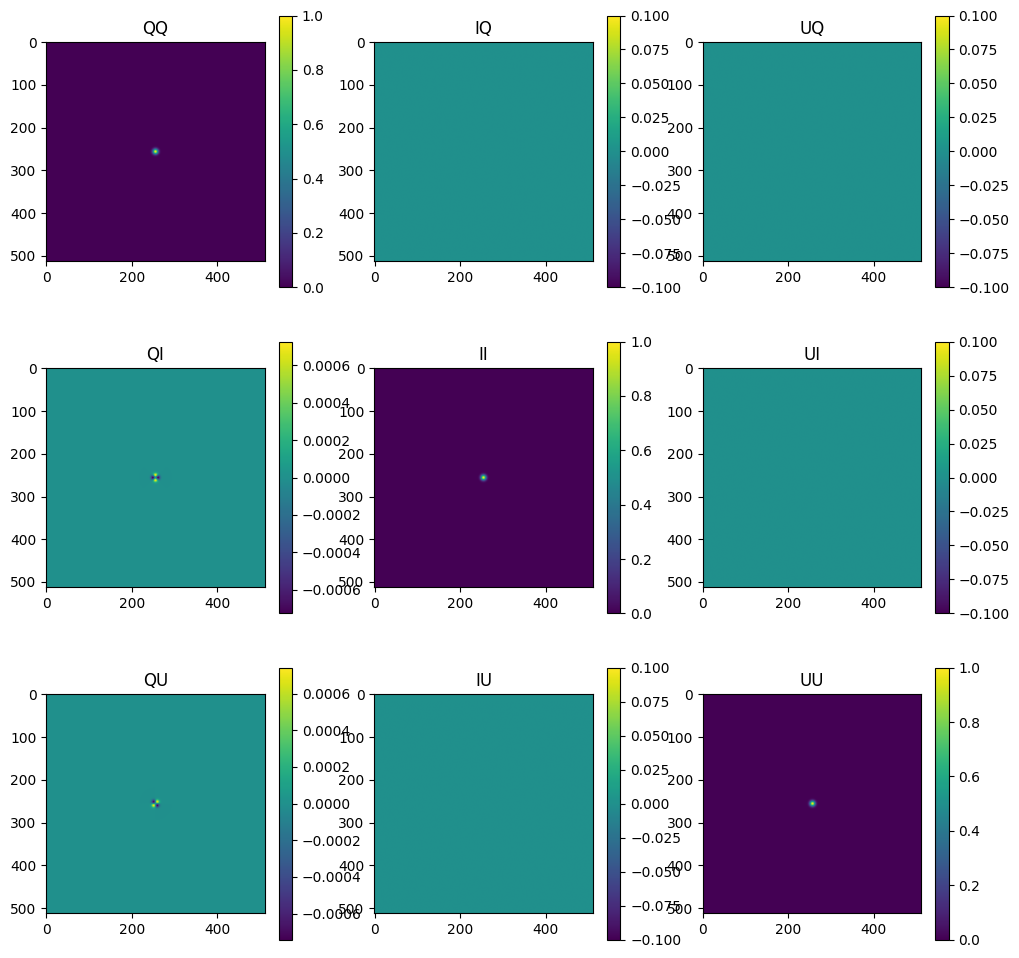

In [3]:
fig, ax = plt.subplots(3,3, figsize=(12,12))

qq = ax[0,0].imshow(abeam.beam_matrix['QQ']) # Q->Q leakage
ax[0,0].set_title('QQ')
plt.colorbar(qq, ax=ax[0,0])

qi = ax[1,0].imshow(abeam.beam_matrix['QI']) # Q->I leakage
ax[1,0].set_title('QI')
plt.colorbar(qi, ax=ax[1,0])

qu = ax[2,0].imshow(abeam.beam_matrix['QU']) # Q->U leakage
ax[2,0].set_title('QU')
plt.colorbar(qu, ax=ax[2,0])

iq = ax[0,1].imshow(abeam.beam_matrix['IQ']) # I->Q leakage
ax[0,1].set_title('IQ')
plt.colorbar(iq, ax=ax[0,1])

ii = ax[1,1].imshow(abeam.beam_matrix['II']) # I->I leakage
ax[1,1].set_title('II')
plt.colorbar(ii, ax=ax[1,1])

iu = ax[2,1].imshow(abeam.beam_matrix['IU']) # I->U leakage
ax[2,1].set_title('IU')
plt.colorbar(iu, ax=ax[2,1])

uq = ax[0,2].imshow(abeam.beam_matrix['UQ']) # U->Q leakage
ax[0,2].set_title('UQ')
plt.colorbar(uq, ax=ax[0,2])

ui = ax[1,2].imshow(abeam.beam_matrix['UI']) # U->I leakage
ax[1,2].set_title('UI')
plt.colorbar(ui, ax=ax[1,2])

uu = ax[2,2].imshow(abeam.beam_matrix['UU']) # U->U leakage
ax[2,2].set_title('UU')
plt.colorbar(uu, ax=ax[2,2])

plt.show()

Next, we would like to see the leakage spectra. We'll need some information about the spectrum for the analysis, which we write into ```spectrum_params```. Then, we can find the $\ell$ values and the leakage spectra.

In [4]:
spectrum_params = {'sky_decomp': [1,0,0], # IQU decomposition, usually [1,0,0]
                   'delta_ell': 10., # spacing between ell bins
                   'ell_max': 10000, # maximum ell value to analyze; keep at 2500 if using CMB_compare in next step
                   'choose_normalization': 'TT', # spectrum to normalize to, usually 'TT'
                   }

ell_abeam, spectra_abeam = mmt_tools.get_mmt_leakage(abeam, spectrum_params)

delta_ell = 85
delta_ell = 85


We can look at the leakage spectra on their own, or compare them to the CMB power spectra:

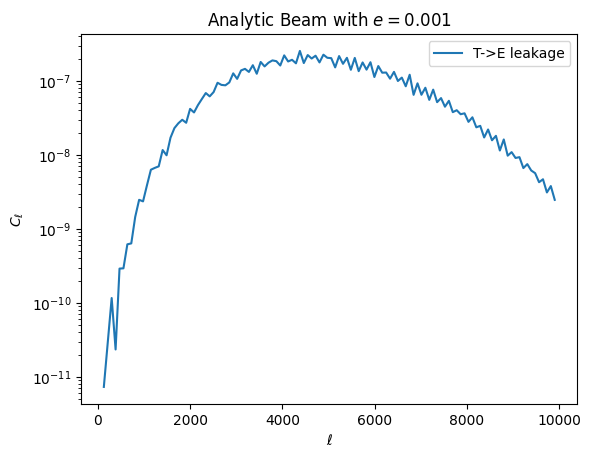

In [10]:
mmt_tools.make_leakage_plot(ell_abeam, spectra_abeam, f"Analytic Beam with $e=${analytic_beam_params['ellipt']}", leakage='TE', CMB_compare=False)

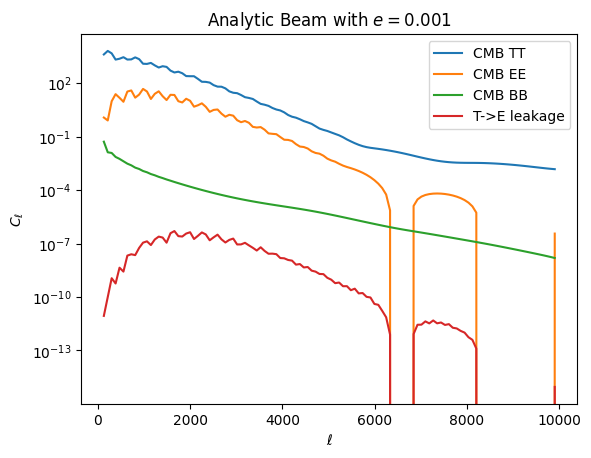

In [9]:
mmt_tools.make_leakage_plot(ell_abeam, spectra_abeam, f"Analytic Beam with $e=${analytic_beam_params['ellipt']}", leakage='TE', CMB_compare=True)

## Exercises

- Change the ellipticity to 0.003, 0.01, and 0.03. What changes about the beam and the leakage?
- Change the pixel_size to x, y, z
- change the beam_fwhm to x, y, z

## HFSS Beam

Now that we know some of the basics of how the beams pipeline works, let's try it out with some feedhorn simulations! There are a lot more beam parameters here, because of how we need to interpret the data to make our beams, and it will take longer to run this process, but from the user side, it is very similar.

In [ ]:
hbeam_params = {'fmin': 125, # lower frequency edge of the band
                'fmax': 165, # upper frequency edge of the band
                'numfreqs': 40, # number of frequencies in between these to analyze
                'folder': {'I': 'hfss_iq/', # where you want to store the I & Q optimization
                           'U': 'hfss_u/', # where you want to store the U optimization
                          },
                'stop_angle': 13., # feedhorn stop angle
                'N': 512, # number of pixels
                'mask_params': {'cen': 44.5, # mask center
                                'telecentricity': 0, # mask telecentricity
                                'savename': 'mask.txt', # filename to store the mask
                               },
                'center_freqs': [150], # center frequency
                'beam_fwhm': 1.5, # FWHM of the beam
                'pixel_size': 0.25/60., # pixel size in degrees
               }
hbeam_params['npix'] = hbeam_params['N']

hbeam = make_beams.HFSSBeam(hbeam_params) # this step is very verbose

```hbeam``` now holds all of the information we need about this beam. Just like before, we can make some plots of the beam leakage and make sure it looks the way we expect it to.

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(10,10))

qq = ax[0,0].imshow(hbeam.beam_matrix['QQ']) # Q->Q leakage
ax[0,0].set_title('QQ')
plt.colorbar(qq, ax=ax[0,0])

qi = ax[1,0].imshow(hbeam.beam_matrix['QI']) # Q->I leakage
ax[1,0].set_title('QI')
plt.colorbar(qi, ax=ax[1,0])

qu = ax[2,0].imshow(hbeam.beam_matrix['QU']) # Q->U leakage
ax[2,0].set_title('QU')
plt.colorbar(qu, ax=ax[2,0])

iq = ax[0,1].imshow(hbeam.beam_matrix['IQ']) # I->Q leakage
ax[0,1].set_title('IQ')
plt.colorbar(iq, ax=ax[0,1])

ii = ax[1,1].imshow(hbeam.beam_matrix['II']) # I->I leakage
ax[1,1].set_title('II')
plt.colorbar(ii, ax=ax[1,1])

iu = ax[2,1].imshow(hbeam.beam_matrix['IU']) # I->U leakage
ax[2,1].set_title('IU')
plt.colorbar(iu, ax=ax[1,2])

uq = ax[0,2].imshow(hbeam.beam_matrix['UQ']) # U->Q leakage
ax[0,2].set_title('UQ')
plt.colorbar(uq, ax=ax[0,2])

ui = ax[1,2].imshow(hbeam.beam_matrix['UI']) # U->I leakage
ax[1,2].set_title('UI')
plt.colorbar(ui, ax=ax[2,1])

uu = ax[2,2].imshow(hbeam.beam_matrix['UU']) # U->U leakage
ax[2,2].set_title('UU')
plt.colorbar(uu, ax=ax[2,2])

plt.show()

We would again like to see the leakage spectra. We'll use the same ```spectrum_params``` as before, for simplicity. Then, we can find the $\ell$ values and the leakage spectra.

In [ ]:
ell_hbeam, spectra_hbeam = mmt_tools.get_mmt_leakage(hbeam, spectrum_params)

We can look at the leakage spectra on their own, or compare them to the CMB power spectra:

In [ ]:
mmt_tools.make_leakage_plot(ell_hbeam, spectra_hbeam, 'Feedhorn Beam', leakage='TE', CMB_compare=False)

In [ ]:
mmt_tools.make_leakage_plot(ell_hbeam, spectra_hbeam, 'Feedhorn Beam', CMB_compare=True)

## Exercises

Now that you know how to use the analytic and data-based pipeline, you can try changing some parameters to see how they affect the leakage spectra. Here are some things to try:

- Change the ```beam_fwhm``` parameter to x, y, 3.0 to see what a larger beam would look like.